In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textwrap import wrap
from IPython.display import JSON

In [231]:
collection = pd.read_json("../github-lambda-java/collection.json")

collection: (sorted by count)

    - count: Number of uses with name
    - name: Name of context 
    - uses: All occurences of such a lambda
        - sourceCode: Text of the lambda's context
        - outerReferences: Number of References that are used in the lambda 
        - file: File where the occurance can get found
        - pos: Position in the file

In [232]:
collection['uses_testless'] = collection['uses'].apply(lambda uses: [use for use in uses if not ("test" in use['file'] or "Test" in use['file'])])
collection['count_testless'] = collection['uses_testless'].apply(lambda uses: len(uses))
collection.sort_values('count_testless', ascending=False, inplace=True)
pd.set_option("display.max_rows", 200)
collection

count                                               name  \
0      4194                   InvocationFieldContext(name=map)   
1      3654               InvocationFieldContext(name=forEach)   
3      3360                InvocationFieldContext(name=filter)   
4      2519                         ReturnContext(type=RETURN)   
7       867       InvocationFieldContext(name=computeIfAbsent)   
13      575             InvocationFieldContext(name=ifPresent)   
11      621               InvocationFieldContext(name=flatMap)   
9       738                   InvocationFieldContext(name=put)   
18      483             InvocationFieldContext(name=subscribe)   
24      420    InvocationFieldContext(name=setOnClickListener)   
12      614                  InvocationFieldContext(name=wrap)   
10      709               InvocationFieldContext(name=execute)   
22      434                  InvocationFieldContext(name=post)   
27      368  NewClassContext(className=ConstructingObjectPa...   
26      373           InvocationFieldContext(name=orElseThrow)   
23      433              InvocationFieldContext(name=anyMatch)   
33      283          InvocationFieldContext(name=declareField)   
32      310             InvocationFieldContext(name=transform)   
31      324                 InvocationFieldContext(name=toMap)   
20      451                InvocationFieldContext(name=submit)   
34      258                  InvocationFieldContext(name=sort)   
30      337                  InvocationFieldContext(name=then)   
45      190          InvocationFieldContext(name=postRunnable)   
46      180     InvocationFieldContext(name=addActionListener)   
53      164         InvocationFieldContext(name=declareObject)   
56      160           InvocationFieldContext(name=sendRequest)   
41      198                InvocationFieldContext(name=create)   
55      160                  InvocationFieldContext(name=warn)   
62      146                        InvocationContext(text=add)   
40      200           InvocationFieldContext(name=addListener)   
64      143            InvocationFieldContext(name=catchError)   
57      156       InvocationFieldContext(name=affixKeySetting)   
17      503                  NewClassContext(className=Thread)   
52      165              InvocationFieldContext(name=removeIf)   
69      127         InvocationFieldContext(name=declareString)   
74      120         InvocationFieldContext(name=runOnUIThread)   
28      358                   InvocationFieldContext(name=add)   
77      117            InvocationContext(text=addFooterButton)   
78      116              InvocationFieldContext(name=addChild)   
35      251                    InvocationFieldContext(name=of)   
75      118            InvocationFieldContext(name=addHandler)   
76      117             InvocationFieldContext(name=orElseGet)   
85      101     InvocationFieldContext(name=setPositiveButton)   
42      196              InvocationFieldContext(name=allMatch)   
95       91               NewClassContext(className=Setting<>)   
51      166               InvocationFieldContext(name=compute)   
87      100          InvocationFieldContext(name=whenComplete)   
102      81                 InvocationFieldContext(name=debug)   
97       87               InvocationFieldContext(name=memoize)   
111      76           InvocationFieldContext(name=thenPromise)   
115      75          InvocationContext(text=withHandledErrors)   
116      74             InvocationFieldContext(name=asyncExec)   
83      106             InvocationFieldContext(name=comparing)   
121      69    InvocationFieldContext(name=declareObjectArray)   
61      148                      InvocationContext(text=super)   
73      121              InvocationFieldContext(name=schedule)   
43      195              InvocationFieldContext(name=mapToObj)   
133      62      NewClassContext(className=PropertyMetadata<>)   
127      67                      InvocationContext(text=toMap)   
107      77             InvocationFieldContext

How many lambda-exppressions are there?

In [233]:
collection['count'].sum()

70554

In [234]:
collection['count_testless'].sum()

33134

How are the uses distributed?

In [235]:
numOfElements = 30

indices = np.arange(numOfElements)
names = collection["name"][0:numOfElements]
counts = collection["count_testless"][0:numOfElements]

plt.figure(figsize=(20, 10))

plt.plot(indices, counts, 'bo')
plt.grid(alpha=0.3)
plt.xticks(indices, names, rotation='vertical')
plt.show()

How many use-cases have to be covered?

Can I ignore the many uses-cases that each occur only a few times?

In [236]:
def amounts(pos):
    return (collection[pos:]['count_testless'].sum(), collection[:pos]['count_testless'].sum())
def percentageAmounts(pos):
    (after, before) = amounts(pos)
    sum_amounts = after + before
    return (after / sum_amounts, before / sum_amounts)

In [237]:
maxIndex = 300
indices = np.arange(maxIndex)

plt.figure(figsize=(20, 10))

plt.plot(indices, [percentageAmounts(i) for i in indices], marker="+")
plt.grid(alpha=0.3)
plt.legend(['other', 'berücksichtigt'])
plt.xlabel("Use-Cases (ordered by number of occurences)")
plt.ylabel("Percentage of covered Use-Cases")
plt.xticks(np.arange(maxIndex, step=10))
plt.show()

this graph is way to smooth. Something cannot be right

this graph would lead be to believe, that the first ~25 Use-Cases are enough to satisfy 50% of all uses

In [242]:
collection[0:25]

count                                               name  \
0    4194                   InvocationFieldContext(name=map)   
1    3654               InvocationFieldContext(name=forEach)   
3    3360                InvocationFieldContext(name=filter)   
4    2519                         ReturnContext(type=RETURN)   
7     867       InvocationFieldContext(name=computeIfAbsent)   
13    575             InvocationFieldContext(name=ifPresent)   
11    621               InvocationFieldContext(name=flatMap)   
9     738                   InvocationFieldContext(name=put)   
18    483             InvocationFieldContext(name=subscribe)   
24    420    InvocationFieldContext(name=setOnClickListener)   
12    614                  InvocationFieldContext(name=wrap)   
10    709               InvocationFieldContext(name=execute)   
22    434                  InvocationFieldContext(name=post)   
27    368  NewClassContext(className=ConstructingObjectPa...   
26    373           InvocationFieldContext(name=orElseThrow)   
23    433              InvocationFieldContext(name=anyMatch)   
33    283          InvocationFieldContext(name=declareField)   
32    310             InvocationFieldContext(name=transform)   
31    324                 InvocationFieldContext(name=toMap)   
20    451                InvocationFieldContext(name=submit)   
34    258                  InvocationFieldContext(name=sort)   
30    337                  InvocationFieldContext(name=then)   
45    190          InvocationFieldContext(name=postRunnable)   
46    180     InvocationFieldContext(name=addActionListener)   
53    164         InvocationFieldContext(name=declareObject)   

                                                 type  \
0                    InvocationFieldContext(name=map)   
1                InvocationFieldContext(name=forEach)   
3                 InvocationFieldContext(name=filter)   
4                          ReturnContext(type=RETURN)   
7        InvocationFieldContext(name=computeIfAbsent)   
13             InvocationFieldContext(name=ifPresent)   
11               InvocationFieldContext(name=flatMap)   
9                    InvocationFieldContext(name=put)   
18             InvocationFieldContext(name=subscribe)   
24    InvocationFieldContext(name=setOnClickListener)   
12                  InvocationFieldContext(name=wrap)   
10               InvocationFieldContext(name=execute)   
22                  InvocationFieldContext(name=post)   
27  NewClassContext(className=ConstructingObjectPa...   
26           InvocationFieldContext(name=orElseThrow)   
23              InvocationFieldContext(name=anyMatch)   
33          InvocationFieldContext(name=declareField)   
32             InvocationFieldContext(name=transform)   
31                 InvocationFieldContext(name=toMap)   
20                InvocationFieldContext(name=submit)   
34                  InvocationFieldContext(name=sort)   
30                  InvocationFieldContext(name=then)   
45          InvocationFieldContext(name=postRunnable)   
46     InvocationFieldContext(name=addActionListener)   
53         InvocationFieldContext(name=declareObject)   

                                                 uses  \
0   [{'sourceCode': 'jarFile.stream().filter(FIND_...   
1   [{'sourceCode': 'goConfigService.getEnvironmen...   
3   [{'sourceCode': 'list.stream().filter((item)->...   
4   [{'sourceCode': 'return (cruiseConfig)->{
    ...   
7   [{'sourceCode': 'translatedStatementNames.comp...   
13  [{'sourceCode': 'jsonReader.optJsonObject("tim...   
11  [{'sourceCode': 'pipelineGroups.stream().flatM...   
9   [{'sourceCode': 'new ImmutableMap.Builder<Stri...   
18  [{'sourceCode': 'wordsObservable.subscribe(thi...   
24  [{'sourceCode': 'holder.image.setOnClickListen...   
12  [{'sourceCode': 'ThreadLocalPropagateContext.w...   
10  [{'sourceCode': 'executor.execute(()->{
    tr...   
22  [{'sourceCode': 'handler.post(()->{
    for (M...   
27  [{'sourceCode': 'new ConstructingObjectParser<...   
2

## How many testcases?

In [179]:
collectionWithOutTest = collection.copy()
collectionWithOutTest['uses'] = collectionWithOutTest['uses'].apply(
    lambda uses: len([True for use in uses if "test" in use['file']]))
collectionWithOutTest.head()

count                                          name  \
0   4194              InvocationFieldContext(name=map)   
1   3654          InvocationFieldContext(name=forEach)   
3   3360           InvocationFieldContext(name=filter)   
4   2519                    ReturnContext(type=RETURN)   
7    867  InvocationFieldContext(name=computeIfAbsent)   

                                           type  uses  \
0              InvocationFieldContext(name=map)  1012   
1          InvocationFieldContext(name=forEach)  1020   
3           InvocationFieldContext(name=filter)   939   
4                    ReturnContext(type=RETURN)   861   
7  InvocationFieldContext(name=computeIfAbsent)   163   

                                       uses_testless  count_testless  
0  [{'sourceCode': 'jarFile.stream().filter(FIND_...            3182  
1  [{'sourceCode': 'goConfigService.getEnvironmen...            2634  
3  [{'sourceCode': 'list.stream().filter((item)->...            2421  
4  [{'sourceCode': 'return (cruiseConfig)->{
    ...            1658  
7  [{'sourceCode': 'translatedStatementNames.comp...             704

In [180]:
collectionWithOutTest['testRatio'] = np.divide(collectionWithOutTest['uses'], collectionWithOutTest['count'])
collectionWithOutTest.head()

count                                          name  \
0   4194              InvocationFieldContext(name=map)   
1   3654          InvocationFieldContext(name=forEach)   
3   3360           InvocationFieldContext(name=filter)   
4   2519                    ReturnContext(type=RETURN)   
7    867  InvocationFieldContext(name=computeIfAbsent)   

                                           type  uses  \
0              InvocationFieldContext(name=map)  1012   
1          InvocationFieldContext(name=forEach)  1020   
3           InvocationFieldContext(name=filter)   939   
4                    ReturnContext(type=RETURN)   861   
7  InvocationFieldContext(name=computeIfAbsent)   163   

                                       uses_testless  count_testless  \
0  [{'sourceCode': 'jarFile.stream().filter(FIND_...            3182   
1  [{'sourceCode': 'goConfigService.getEnvironmen...            2634   
3  [{'sourceCode': 'list.stream().filter((item)->...            2421   
4  [{'sourceCode': 'return (cruiseConfig)->{
    ...            1658   
7  [{'sourceCode': 'translatedStatementNames.comp...             704   

   testRatio  
0   0.241297  
1   0.279146  
3   0.279464  
4   0.341802  
7   0.188005

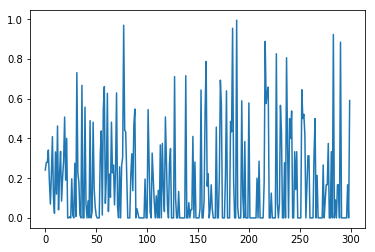

In [181]:

plt.plot(indices, collectionWithOutTest['testRatio'][:len(indices)])